# Summing up sine-waves with different amplitudes

By multiplying a **column** vector for the frequencies with a **row** vector for the time-steps we can in one step create a data-matrix

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Generate column- and row-vectors

In [5]:
# Set the parameters
rate = 1000
dt = 1 / rate

omega = 2*np.pi * np.c_[[1, 15]]   # This is a quick way to generate a 2x1 matrix, i.e. a column-vector ...
amps = np.r_[1, 0.1]     # ... and this to generate a 1-dimensional row-vector
t = np.arange(0, 1, dt)  # also a 1-dimensional row-vector

In [6]:
# Column vectors can also be created with
freqs2 = np.atleast_2d([1.5, 8]).T
print(freqs2)

[[1.5]
 [8. ]]


## Broadcasting vs Matrix-multiplication
Now create a rows of sines - in one step!

Note that *omega* is a '2x1 array', i.e. a column vector, and *t* is a row-vector with 1000 elements

*numpy* uses *broadcasting* to find the matching dimension, and generates a '2x1000' array:

(2, 1000)

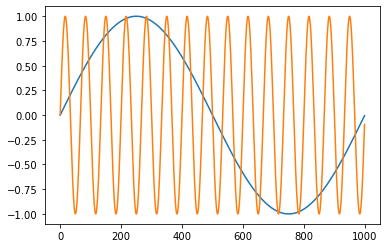

In [7]:
sine_mat = np.sin(omega * t) 
plt.plot(sine_mat.T)
sine_mat.shape

In [8]:
# Note the difference between 'broadcasting', and manually using the rules of matrix multiplication
# I use short vectors here, to enable us to see all elements
r = np.arange(3)       # vector
r2 = np.atleast_2d(r)  # 2d-matrix, shape 1x3
c = np.c_[[1, 2]]      # 2d_matrix, shape 2x1

# The next three operations yield the same result
print(c * r)           # broadcasting
print(r * c)           # also broadcasting
print(c @ r2)          # equivalent matrix multiplication

[[0 1 2]
 [0 2 4]]
[[0 1 2]
 [0 2 4]]
[[0 1 2]
 [0 2 4]]


In [9]:
# Just to be sure:
print((c * r) == (r * c))
print((c * r) == (c @ r2))

[[ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]]


## Putting it all together
The next step is to implement

\begin{equation}
    output = \sum_{i=[0, 1]} amp_i * \sin(omega_i * t)
\end{equation}

By multiplying a **(1x2)-amplitude vector** with a **(2xn)-data matrix** we obtain a **(1xn)**-shaped output
(From Python 3.5 on, "@" can be used for the scalar product):

(2,)


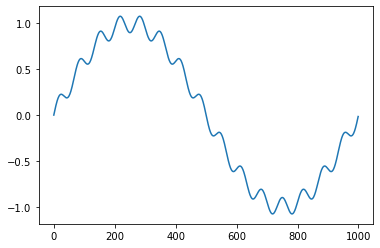

In [10]:
# Now multiply the data-matrix with the correpsponding amplitudes, and sum up the results
output = amps @ np.sin(omega * t)
plt.plot(output)
print(amps.shape)

## Doing it in Loops

For Exercise 1 you are supposed to evaluate the incoming sound in short time-windows. Here is how this can be done

In [11]:
# Pre-allocate memory, to make the loop faster
output = np.ones_like(t)

In [12]:
win_size = 101  # I deliberately choose an uneven "win_size", to demonstrate how to handle the reminder
for loop_nr in range(len(output)//win_size):  # "//" gives the floored integer of the division
    start = loop_nr * win_size
    stop = start + win_size
    output[start:stop] = amps @ sine_mat[:, start:stop]  # Since this is a demo, I leave "amps" constant

# And to finish up the last few points
output[stop:] = amps @ sine_mat[:,stop:]

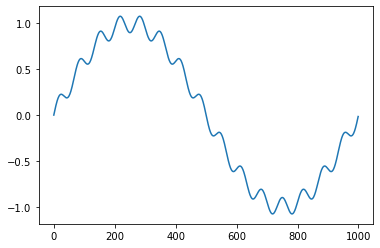

In [13]:
plt.plot(output)

[Soundproc_4_Stimulation.ipynb](Soundproc_4_Stimulation.ipynb)<img src="data/images/Backward.png" align="middle"> 

    Author: Thomas Haslwanter
    Date: Feb 20, 2023

<img src="data/images/CCA_40.png">

*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.